In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part A: Data Preparation
### 1. Load dataset & display first 5 rows.


In [2]:
dataset = pd.read_csv("employee_performance_dataset.csv")

In [3]:
dataset.head()

,Employee_ID,Name,Department,Age,Gender,Years_at_Company,Goals_Achieved,Projects_Completed,Trainings_Attended,Attendance_%,Customer_Feedback,Salary(LPA),Performance_Score
0,E1000,Seth,Sales,50,Male,11,12,5,1,74.679836,8,8.67,7.3
1,E1001,Maria,IT,45,Male,3,10,5,1,91.659963,6,3.01,6.3
2,E1002,Mary,HR,42,Male,1,16,10,5,70.211989,9,7.95,11.3
3,E1003,Kyle,Sales,49,Male,12,20,3,3,85.427033,9,3.79,10.4
4,E1004,Sandra,Marketing,28,Female,5,13,7,1,98.466566,2,9.55,7.7


### 2.	Check for missing values, datatypes, and descriptive statistics.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee_ID         500 non-null    object 
 1   Name                500 non-null    object 
 2   Department          500 non-null    object 
 3   Age                 500 non-null    int64  
 4   Gender              500 non-null    object 
 5   Years_at_Company    500 non-null    int64  
 6   Goals_Achieved      500 non-null    int64  
 7   Projects_Completed  500 non-null    int64  
 8   Trainings_Attended  500 non-null    int64  
 9   Attendance_%        500 non-null    float64
 10  Customer_Feedback   500 non-null    int64  
 11  Salary(LPA)         500 non-null    float64
 12  Performance_Score   500 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 50.9+ KB


In [5]:
dataset.describe()

,Age,Years_at_Company,Goals_Achieved,Projects_Completed,Trainings_Attended,Attendance_%,Customer_Feedback,Salary(LPA),Performance_Score
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000
mean,40.14400,7.434000,12.292000,5.316000,2.424000,85.232441,5.392000,11.56360,7.53560
std,10.69411,4.027168,4.480053,2.910169,1.757955,8.677635,2.839447,4.96614,2.05453
min,22.00000,1.000000,5.000000,1.000000,0.000000,70.004041,1.000000,3.01000,3.30000
25%,31.00000,4.000000,9.000000,3.000000,1.000000,77.574124,3.000000,7.21500,5.97500
50%,41.00000,7.000000,12.000000,5.000000,2.000000,85.559802,5.000000,11.77500,7.55000
75%,49.00000,11.000000,16.000000,8.000000,4.000000,92.881806,8.000000,15.94500,9.00000
max,59.00000,14.000000,20.000000,10.000000,5.000000,99.912345,10.000000,20.00000,12.30000


In [6]:
dataset.isna().sum()

Employee_ID           0
Name                  0
Department            0
Age                   0
Gender                0
Years_at_Company      0
Goals_Achieved        0
Projects_Completed    0
Trainings_Attended    0
Attendance_%          0
Customer_Feedback     0
Salary(LPA)           0
Performance_Score     0
dtype: int64

### 3.	Categorize employees into age groups: 22–30, 31–40, 41–50, 51+.

In [7]:
dataset.head()


,Employee_ID,Name,Department,Age,Gender,Years_at_Company,Goals_Achieved,Projects_Completed,Trainings_Attended,Attendance_%,Customer_Feedback,Salary(LPA),Performance_Score
0,E1000,Seth,Sales,50,Male,11,12,5,1,74.679836,8,8.67,7.3
1,E1001,Maria,IT,45,Male,3,10,5,1,91.659963,6,3.01,6.3
2,E1002,Mary,HR,42,Male,1,16,10,5,70.211989,9,7.95,11.3
3,E1003,Kyle,Sales,49,Male,12,20,3,3,85.427033,9,3.79,10.4
4,E1004,Sandra,Marketing,28,Female,5,13,7,1,98.466566,2,9.55,7.7


In [8]:
def ageGroup(a):
    if a <=30:
        return "22-30" 
    elif a <=40:
        return "31-40" 
    elif a<=50:
        return "41-50"
    else:
        return "51+"
dataset['Age Groups'] = dataset['Age'].apply(ageGroup)

# Part B: Exploratory Data Analysis (EDA)
### 1.	Find average performance by department.


In [9]:
dataset.groupby("Department")["Performance_Score"].mean()


Department
Finance      7.658654
HR           7.073404
IT           7.702041
Marketing    7.535714
Sales        7.691304
Name: Performance_Score, dtype: float64

### 2.	Find the top 10 employees by performance score.

In [10]:
dataset.sort_values(by='Performance_Score',ascending=False).head(10)

,Employee_ID,Name,Department,Age,Gender,Years_at_Company,Goals_Achieved,Projects_Completed,Trainings_Attended,Attendance_%,Customer_Feedback,Salary(LPA),Performance_Score,Age Groups
302,E1302,Carol,Sales,23,Male,9,20,9,3,85.724775,10,15.94,12.3,22-30
166,E1166,John,HR,39,Female,1,20,10,3,76.988784,7,10.85,12.3,31-40
245,E1245,Brittany,Marketing,32,Female,7,19,10,4,75.537554,8,16.49,12.2,31-40
252,E1252,Lisa,HR,49,Female,7,20,10,0,81.727180,9,11.45,11.9,41-50
467,E1467,Patrick,Sales,57,Female,7,20,8,5,81.795856,5,5.54,11.9,51+
154,E1154,Kelly,Marketing,55,Female,7,19,8,5,74.050038,8,6.65,11.8,51+
342,E1342,Scott,Finance,32,Female,2,19,9,4,77.629659,6,17.08,11.7,31-40
202,E1202,Sarah,IT,52,Female,6,20,9,0,98.579459,9,3.67,11.6,51+
81,E1081,Martin,IT,22,Female,5,20,7,5,90.751432,5,20.00,11.6,22-30
128,E1128,Stephen,IT,36,Male,5,19,9,4,80.055917,4,16.39,11.5,31-40


### 3.	Compare average salary across departments.

In [12]:
dataset.groupby('Department')['Salary(LPA)'].mean()

Department
Finance      11.619423
HR           10.774149
IT           12.030306
Marketing    11.666875
Sales        11.684239
Name: Salary(LPA), dtype: float64

### 4.	Compare performance by gender.

In [19]:
dataset.groupby('Gender')['Performance_Score'].sum()

Gender
Female    1867.1
Male      1900.7
Name: Performance_Score, dtype: float64

### 5.	Find correlation between Attendance, Feedback, Trainings, Salary, and Performance.

In [25]:
dataset.corr(numeric_only=True)

,Age,Years_at_Company,Goals_Achieved,Projects_Completed,Trainings_Attended,Attendance_%,Customer_Feedback,Salary(LPA),Performance_Score
Age,1.000000,0.038936,-0.062953,-0.112671,0.020410,0.027007,0.046645,0.019041,-0.092848
Years_at_Company,0.038936,1.000000,-0.025477,-0.092777,-0.050672,0.051353,-0.000186,-0.001049,-0.070343
Goals_Achieved,-0.062953,-0.025477,1.000000,0.013967,0.006895,-0.009870,-0.031071,0.027668,0.875050
Projects_Completed,-0.112671,-0.092777,0.013967,1.000000,-0.005089,-0.069312,0.072286,-0.079546,0.446241
Trainings_Attended,0.020410,-0.050672,0.006895,-0.005089,1.000000,0.084055,-0.051029,0.003626,0.167928
Attendance_%,0.027007,0.051353,-0.009870,-0.069312,0.084055,1.000000,0.026001,-0.028859,-0.020084
Customer_Feedback,0.046645,-0.000186,-0.031071,0.072286,-0.051029,0.026001,1.000000,0.033866,0.133088
Salary(LPA),0.019041,-0.001049,0.027668,-0.079546,0.003626,-0.028859,0.033866,1.000000,-0.004368
Performance_Score,-0.092848,-0.070343,0.875050,0.446241,0.167928,-0.020084,0.133088,-0.004368,1.000000


## Part C: Visualization (Matplotlib + Seaborn)
### 1.	Bar chart → Department-wise average performance.


<BarContainer object of 5 artists>

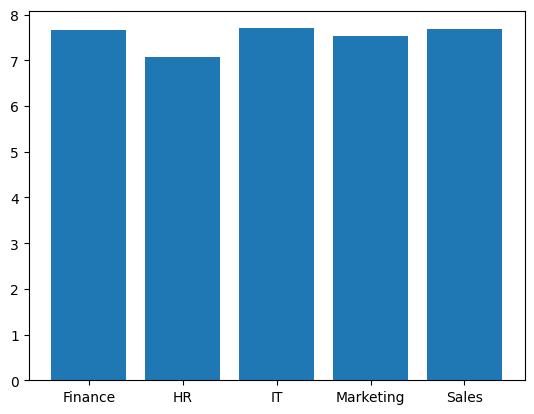

In [34]:
types = dataset.groupby('Department')['Performance_Score'].mean().index
values = dataset.groupby('Department')['Performance_Score'].mean().values
plt.bar(types,values)

### 2.	Boxplot → Salary distribution by department.

{'whiskers': [<matplotlib.lines.Line2D at 0x1e855fe8050>,
 'caps': [<matplotlib.lines.Line2D at 0x1e855fe82d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e855fabed0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e855fe8550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e855fe8690>],
 'means': []}

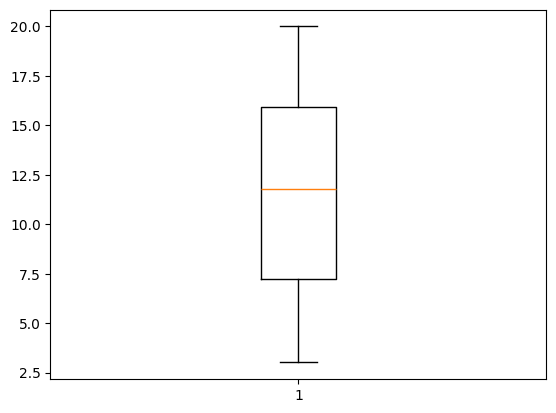

In [37]:
plt.boxplot(dataset['Salary(LPA)'])

### 3.	Histogram → Age distribution of employees.

<Axes: xlabel='Age', ylabel='Count'>

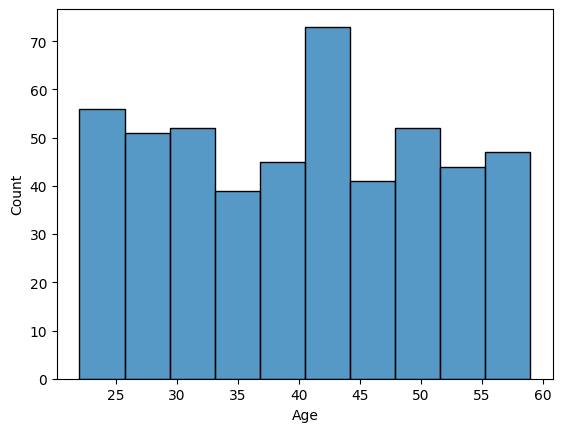

In [38]:
sns.histplot(dataset['Age'])

### 4.	Heatmap → Correlation matrix.

<Axes: >

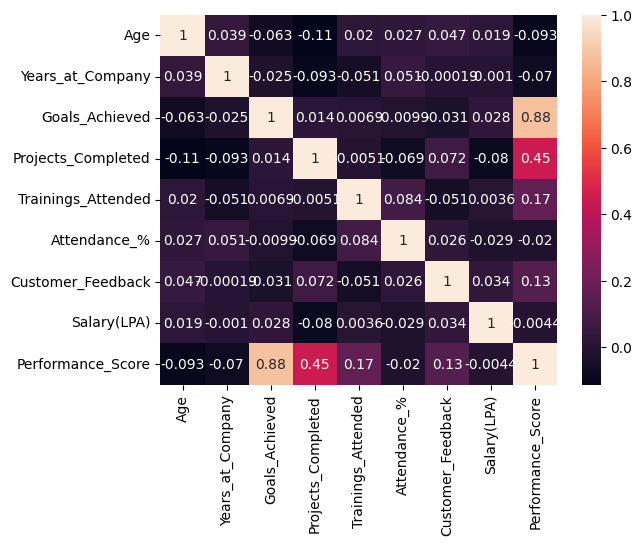

In [40]:
sns.heatmap(dataset.corr(numeric_only=True),annot=True)

### 5.	Scatter plot → Salary vs Performance_Score.

<Axes: xlabel='Salary(LPA)', ylabel='Performance_Score'>

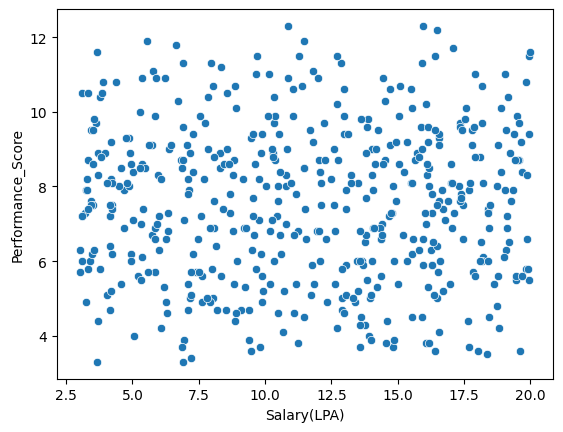

In [41]:
sns.scatterplot(x='Salary(LPA)',y='Performance_Score',data=dataset)